In [1]:
from src.utils import *
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
%matplotlib inline

/Users/liviachang/anaconda/lib/python2.7/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [2]:
def to_percent(y, position):
    return str(100*y) + '%'
    
formatter = FuncFormatter(to_percent)
SIZE_BIG = 32
SIZE_MED = 16
plt.rc('font', size=SIZE_MED)  # controls default text sizes
plt.rc('axes', titlesize=SIZE_BIG)  # fontsize of the axes title
plt.rc('axes', labelsize=SIZE_BIG)  # fontsize of the x any y labels
plt.rc('xtick', labelsize=SIZE_MED)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE_MED)  # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE_MED)  # legend fontsize
plt.rc('figure', titlesize=SIZE_BIG)  # # size of the figure title

In [12]:
TK_topics_LDA, TP_info_LDA = load_topics_data('LDA')
TK_ratings, TK_info, U_ftalks, R_mat = load_ted_data()
n_users = len(U_ftalks['uid_idiap'].unique())
n_talks = TK_info.shape[0]
print 'Total {} users, {} talks'.format(n_users, n_talks)

2016/11/18 11:44:51: Loading topic data from LDA
2016/11/18 11:44:52: Loading talk data
2016/11/18 11:44:52: Loading user data
Total 10901 users, 2318 talks


Total 10901 users
# favorate talks per user: Avg = 9.3, Med = 3.0
45.4% of users have 4+ favorite talks


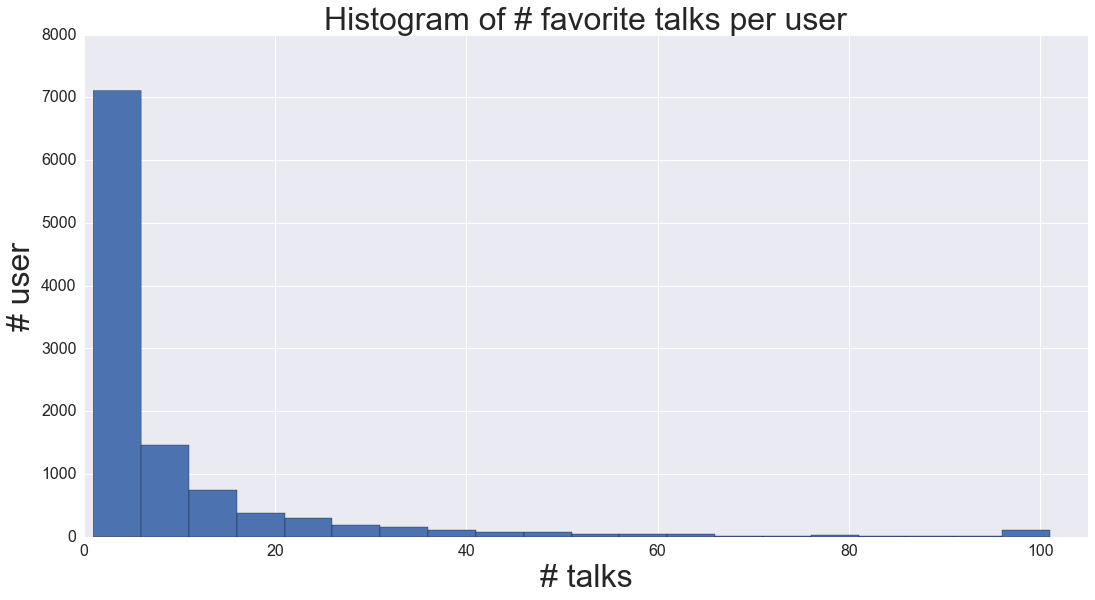

In [13]:
f, ax = plt.subplots(1, figsize=(18,9))

ntalks_per_user = U_ftalks[['uid_idiap', 'tid']].groupby('uid_idiap').count()
ntalks_per_user = np.array( ntalks_per_user.ix[:,0].tolist() )
avg_ntalk_per_user = np.mean(ntalks_per_user)
med_ntalk_per_user = np.median(ntalks_per_user)

data = ntalks_per_user.copy()
data[data>100] = 101
plt.hist(data, bins=20)#, normed=True)
plt.xlim([0,105])
plt.xlabel('# talks'); plt.ylabel('# user')
plt.title('Histogram of # favorite talks per user');
#plt.gca().yaxis.set_major_formatter(formatter);

plt.savefig('img/n_ftalks_per_user.png')

print '# favorate talks per user: Avg = {:.1f}, Med = {:.1f}'.format(\
    avg_ntalk_per_user, med_ntalk_per_user)
print '{:.1f}% of users have 4+ favorite talks'.format(1e2*np.mean(ntalks_per_user>=4))

# users per talk favorited: Avg = 84.3, Med = 55.0


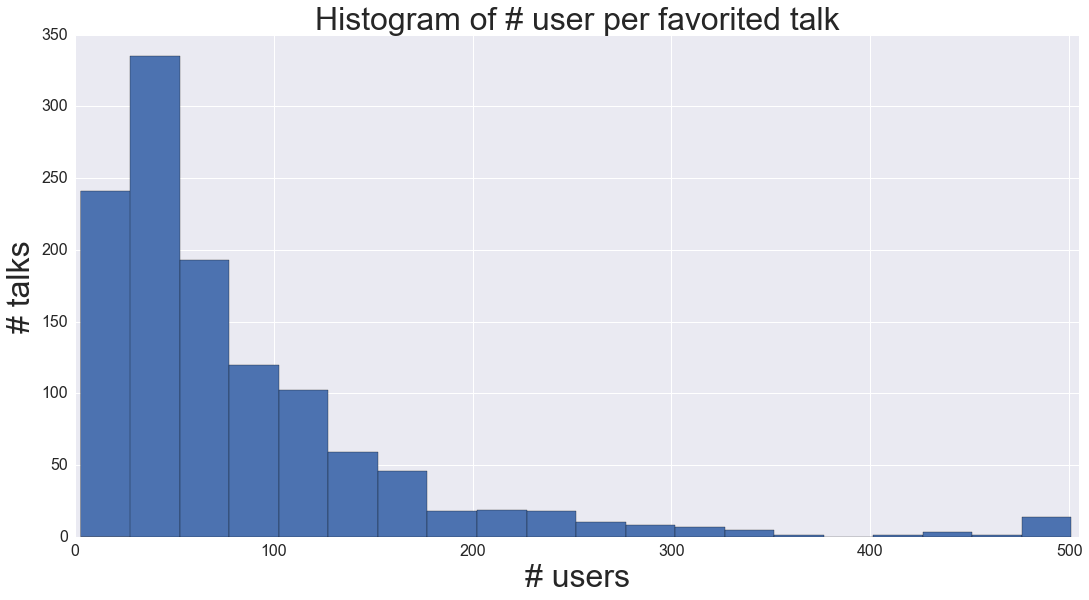

In [14]:
f, ax = plt.subplots(1, figsize=(18,9))

nusers_per_ftalk = U_ftalks[['uid_idiap', 'tid']].groupby('tid').count()
nusers_per_ftalk = np.array( nusers_per_ftalk.ix[:,0].tolist() )
avg_nusers_per_ftalk = np.mean(nusers_per_ftalk)
med_nusers_per_ftalk = np.median(nusers_per_ftalk)

data = nusers_per_ftalk.copy()
data[data>500] = 501
plt.hist(data, bins=20)#, normed=True)

#data = plt.hist(nusers_per_ftalk, bins=20)#, normed=True)
#count = data[0] / sum(data[0])
#pos = np.array(data[1])
#pos = (pos[1:] + pos[:-1]) / 2
#ax.bar(pos, count)

plt.xlim([0,505])
plt.xlabel('# users'); plt.ylabel('# talks')
plt.title('Histogram of # user per favorited talk');
#plt.gca().yaxis.set_major_formatter(formatter);

plt.savefig('img/n_users_per_ftalk.png')

print '# users per talk favorited: Avg = {:.1f}, Med = {:.1f}'.format(\
    avg_nusers_per_ftalk, med_nusers_per_ftalk)

# scraped talks = 2318


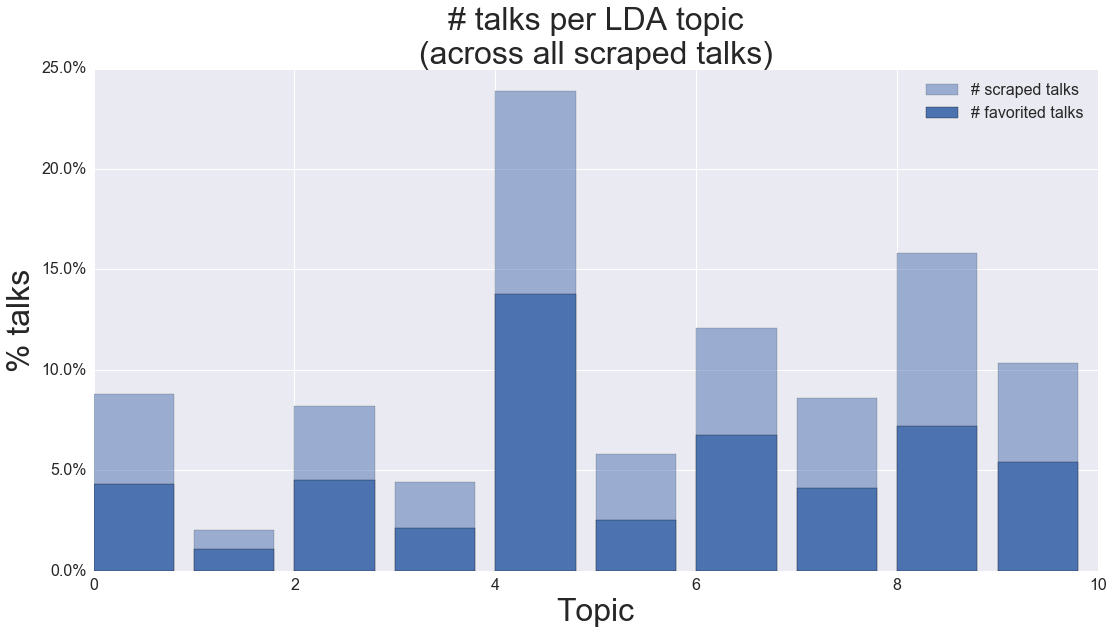

In [6]:
f, ax = plt.subplots(1, figsize=(18,9))

print '# scraped talks = {}'.format(TK_topics_LDA.shape[0])
talks_per_topic_LDA = TK_topics_LDA['top_topic1'].value_counts()
talks_per_topic_LDA = talks_per_topic_LDA.sort_index() / sum(talks_per_topic_LDA)

fav_tids = U_ftalks.tid.unique()
ftalks_per_topic_LDA = TK_topics_LDA.ix[fav_tids,'top_topic1'].value_counts()
ftalks_per_topic_LDA = ftalks_per_topic_LDA.sort_index() / TK_topics_LDA.shape[0]

ax.bar(talks_per_topic_LDA.index, talks_per_topic_LDA, alpha=0.5, label='# scraped talks')
ax.bar(ftalks_per_topic_LDA.index, ftalks_per_topic_LDA, label='# favorited talks')

plt.xlabel('Topic'); plt.ylabel('% talks')
plt.title('# talks per LDA topic\n(across all scraped talks)')
plt.legend()
plt.gca().yaxis.set_major_formatter(formatter);

plt.savefig('img/n_talks_per_edatopic_scraped.png')

# idiap talks = 1201


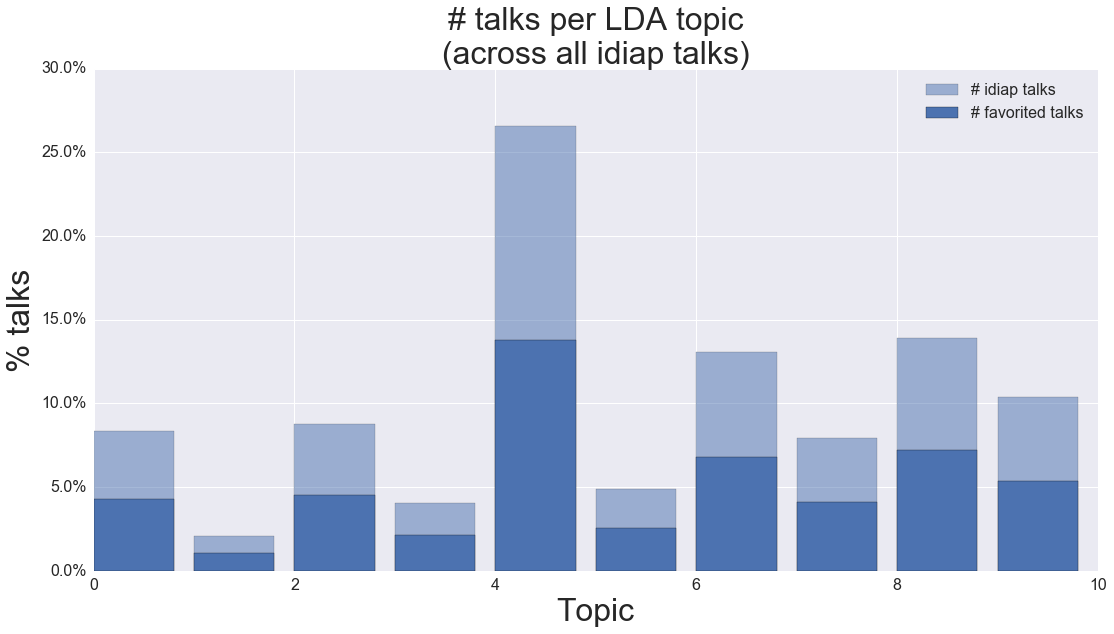

In [7]:
f, ax = plt.subplots(1, figsize=(18,9))

tids_idiap = TK_info.index[TK_info['related_themes'].apply(lambda x: isinstance(x, str))]
print '# idiap talks = {}'.format(len(tids_idiap))

talks_per_topic_LDA = TK_topics_LDA.ix[tids_idiap, 'top_topic1'].value_counts()
talks_per_topic_LDA = talks_per_topic_LDA.sort_index() / sum(talks_per_topic_LDA)

fav_tids = U_ftalks.tid.unique()
ftalks_per_topic_LDA = TK_topics_LDA.ix[fav_tids,'top_topic1'].value_counts()
ftalks_per_topic_LDA = ftalks_per_topic_LDA.sort_index() / TK_topics_LDA.shape[0]

ax.bar(talks_per_topic_LDA.index, talks_per_topic_LDA, alpha=0.5, label='# idiap talks')
ax.bar(ftalks_per_topic_LDA.index, ftalks_per_topic_LDA, label='# favorited talks')

plt.xlabel('Topic'); plt.ylabel('% talks')
plt.title('# talks per LDA topic\n(across all idiap talks)')
plt.legend()
plt.gca().yaxis.set_major_formatter(formatter);

plt.savefig('img/n_talks_per_edatopic_idiap.png')

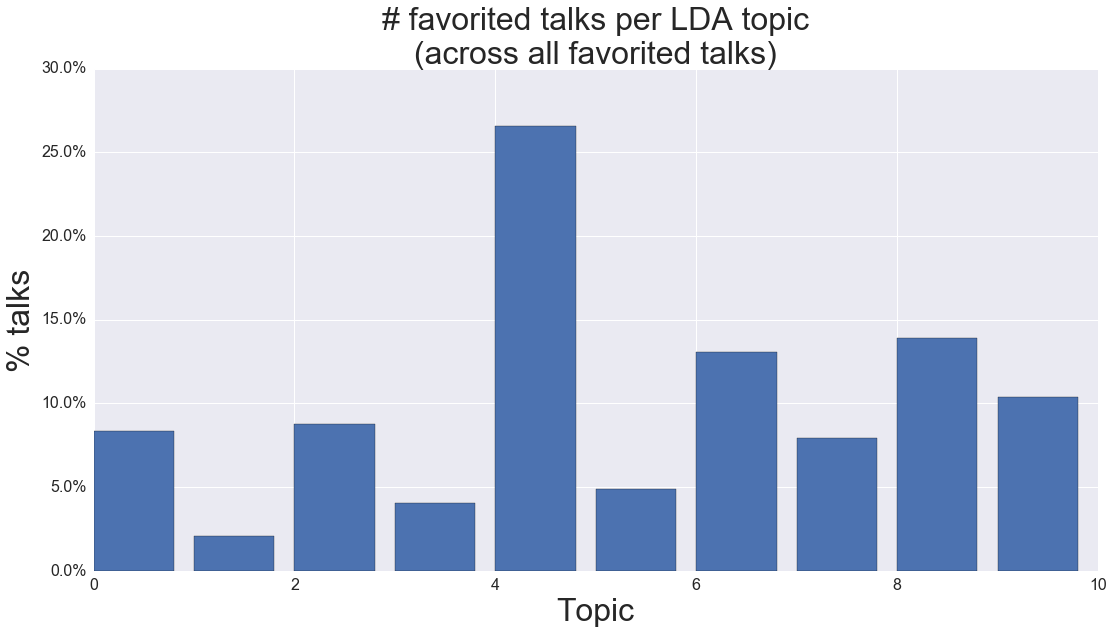

In [8]:
f, ax = plt.subplots(1, figsize=(18,9))

fav_tids = U_ftalks.tid.unique()
ftalks_per_topic_LDA = TK_topics_LDA.ix[fav_tids,'top_topic1'].value_counts()
ftalks_per_topic_LDA = ftalks_per_topic_LDA.sort_index() / sum(ftalks_per_topic_LDA)
plt.bar(ftalks_per_topic_LDA.index, ftalks_per_topic_LDA)

plt.xlabel('Topic'); plt.ylabel('% talks')
plt.title('# favorited talks per LDA topic\n(across all favorited talks)')
plt.gca().yaxis.set_major_formatter(formatter);

plt.savefig('img/n_talks_per_edatopic_fav.png')